## Data Stewardship -- Problem Set 5: Efficient Coding and Data Manipulation in R
In this problem set, you will clean the raw air quality measurement from the `example_air_quality.csv` dataset, join them with additional information about each monitoring station, and analyze difference in PM2.5 concentrations across the locations. Recall from lecture that the CSV contains the following variables:

    - timestamp: the date and time of each measurement
    - location: the monitoring site (North, South, East, or West Station)
    - temperature_C: temperature in degrees Celsius
    - humidity_percent: relative humidity (%)
    - pm25: fine particulate matter concentration (µg/m³)
    - no2_ppb: nitrogen dioxide (parts per billion)
    - ozone_ppb: ozone (parts per billion)


Throughout this problem set, be sure to include comments with meaningful descriptions for each step. 

As always, use sources like Google, Stack Overflow, documentation, and other forums for help. Try to avoid AI in order to develop your own ability to conceptualize solution strategies.

## Question 0: Set-up Working Directory (3 points)

Before starting work on your data proper, it is good practice to check what working directory (i.e. folder) your code thinks it is working in.

1. What function can you use to check the current working directory of this Jupytr notebook in R? Run this function and save its output in an object called `my_wd`.

2. What function can you use to check the files contained in your current working directory? Run this function and save its output in an object called `my_files`.

3. Where is the data file `example_air_quality.csv` in your current working directory? Use the `setwd()` function to navigate to the directory where `example_air_quality.csv` is located, run the function from 2. to verify that you have the data, and save your output in an object called `locate_data`.

Navigate back to your original working directory when you are done.

In [3]:
# check current working directory
# uncomment the below line of code to get started
# my_wd <- <FUNCTION NAME HERE>()
### BEGIN SOLUTION
my_wd <- getwd()
my_wd
### END SOLUTION

[1] "/home/user/course-2-data-stewardship/module-5/pset-student"

In [4]:
# check files in current working directory
# uncomment the below line of code to get started
# my_files <- <FUNCTION NAME HERE>(my_wd)
### BEGIN SOLUTION
my_files <- list.files(my_wd)
my_files
### END SOLUTION

[1] "C2M5_practice-set.ipynb" "data"                   
[3] "DUE_DATE.txt"            "student"

In [5]:
# locate example_air_quality.csv
# uncomment the below lines of code to get started
# setwd('[SUBFOLDER NAME HERE]')
# locate_data <- 
### BEGIN SOLUTION
setwd('data')
locate_data <- list.files(getwd())
locate_data
### END SOLUTION

[1] "example_air_quality.csv"

In [10]:
# Navigate back to your original working directory
# uncomment the below line and run it
#setwd(my_wd)
# pro tip - you can also run: setwd("../") "../" means "one directory level up".

[1] "/home/user/course-2-data-stewardship/module-5/pset-student/data"

In [0]:
# your grade is based on the following tests: 

# Question 0 test 
if (!grepl('/course-2-data-stewardship/module-5/pset-student',my_wd)){
    stop("You didn't obtain the current working directory.")
} else if(!identical(list.files(my_wd),c('C2M5_practice-set.ipynb','data','DUE_DATE.txt'))){
    stop("You didn't obtain the contents of the current working directory.")
} else if (locate_data!='example_air_quality.csv'){
    stop("You didn't locate the data directory.")
} else{
    print("Nice work, you understood working directory set-up correctly.")
}

## Question 1: Code Organization (3 points)

Start your notebook by setting it up in a clean and organized way with clear, descriptive naming:

1. Load the relevant libraries for data cleaning and visualization.
2. Import `example_air_quality.csv`.  
   - If you are running into problems at this step - what is your current working directory? What directory is `example_air_quality.csv` in? How should you change the input to your `read.csv()` function to account for the difference?
3. Inspect the dataset to refresh your memory of its variables and data types.

Recall from your lecture videos this week: what was the main problem Mitch discussed with respect to the `example_air_quality.csv` dataset?

4. Create a new cleaned dataframe that:
   - Fixes this problem for the `pm25` or `timestamp` columns (it should take no longer than 2-3 lines of code), and
   - Converts the `timestamp` column from a character string into a proper date/datetime format using `mutate(timestamp = as.POSIXct(timestamp, format = "%m/%d/%y %H:%M"))`

Recall from Data Foundations last week that `mutate()` is the tidyverse function for creating a new column in your dataset.

Feel free to use additional sources to learn more about date and datetime formats in R: https://stat.ethz.ch/R-manual/R-devel/library/base/html/as.POSIXlt.html.


In [4]:
# load libraries
### BEGIN SOLUTION
library(tidyverse)
### END SOLUTION

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# import data
# uncomment the below line of code to get started
# air_quality_df <- read.csv(YOUR DATA FILE PATH HERE)
### BEGIN SOLUTION
air_quality_df <- read.csv('data/example_air_quality.csv')
### END SOLUTION

In [4]:
# inspect the data
### BEGIN SOLUTION
head(air_quality_df,20)
### END SOLUTION

,timestamp,location,temperature_C,humidity_percent,pm25,no2_ppb,ozone_ppb
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7/1/23 0:00,West Station,23.5,45.8,14.5,16.7,17.2
2,7/1/23 1:00,East Station,21.6,55.8,15.9,19.4,25.2
3,7/1/23 2:00,North Station,23.9,NA,19.6,32.5,30.0
4,7/1/23 3:00,North Station,26.6,52.0,19.4,31.1,30.4
5,7/1/23 4:00,West Station,21.3,58.4,2.4,24.8,26.4
6,7/1/23 5:00,North Station,21.3,64.0,5.4,26.2,35.0
7,7/1/23 6:00,North Station,NA,78.9,15.6,37.8,21.5
8,7/1/23 7:00,West Station,24.3,61.7,15.6,19.1,28.9
9,7/1/23 8:00,South Station,20.6,NA,15.6,30.5,31.0


In [6]:
# clean data
# uncomment the below line of code to get started
# clean_AQ_df <- air_quality_df %>%
    # Fix problem for pm25 and timestamp columns
    ### BEGIN SOLUTION
clean_AQ_df <- air_quality_df %>%
    filter(!is.na(pm25) & timestamp!="") %>% 
    ### END SOLUTION
    # convert timestamp column 
    ### BEGIN SOLUTION
    mutate(timestamp= as.POSIXct(timestamp, format = "%m/%d/%y %H:%M"))
    ### END SOLUTION

In [11]:
# your grade is based on the following tests: 

# Question 1 test 
if (nrow(clean_AQ_df)!=93 | sum(is.na(clean_AQ_df$timestamp))+sum(is.na(clean_AQ_df$pm25))!=0){
    stop("You did not clean the dataframe correctly.")
} else if (class(clean_AQ_df$timestamp)[1]!='POSIXct'){
    stop("You did not convert the timestamp column correctly.")
} else{
    print("Nice work, you cleaned the dataframe correctly.")
}

[1] "Nice work, you cleaned the dataframe correctly."


## Question 2: Creating a Metadata Table for Joins (2 points)

Now, we have a cleaned dataset with PM2.5 measurements at the four monitoring stations, but those values alone don’t explain why air quality might differ from place to place. To better interpret the data, we need more information about the stations themselves.

First, we’ll assign each station a site type to describe its surrounding environment:

    - North Station → Urban
    - South Station → Near-road
    - West Station → Suburban
    - East Station → Waterfront


Second, air quality monitors can sometimes give measurements that are different from the true PM2.5 concentration in the air. Small differences in the type of sensor, how old it is, or how well it has been maintained can affect the numbers it reports.

To make the data comparable across locations, researchers often apply calibration factors. A calibration factor is a simple multiplier that adjusts each monitor’s readings, so they are more consistent with a trusted baseline.

For example, if a sensor tends to read 5% too high, a calibration factor of ~0.95 (1.00/1.05) will scale it down. If a sensor reads a bit too low, perhaps 97% of the true value, a factor near 1.03 (1.00/0.97) will scale it up. These adjustments make values across sites more directly comparable.

For our four stations, we’ll use the following sample calibration factors:

    - North Station → 0.98 (slightly high, scaled down 2%)
    - South Station → 1.03 (slightly low, scaled up 3%)
    - West Station → 1.00 (well calibrated, no adjustment)
    - East Station → 1.05 (reads low, scaled up 5%)

Now, create a dataframe called `site_meta` containing three columns with clear, descriptive names corresponding to

    - Location (station name - make sure you use the exact same text for both column name and column values as your cleaned data frame from Q1!)
    - Site Type (as listed above)
    - Calibration Factor (as listed above)

Make sure your dataframe has the rows and columns in the exact order above, otherwise you may not receive credit for your answer.

Lastly, print the `site_meta` dataframe.

In [7]:
# create a dataframe
### BEGIN SOLUTION
# construct metadata table
site_meta <- tibble(
  location = c("North Station", "South Station", "West Station", "East Station"),
  site_type = c("Urban", "Near-road", "Suburban", "Waterfront"),
  calibration_factor = c(0.98, 1.03, 1.00, 1.05)
)
### END SOLUTION

# print the dataframe - just uncomment the line of code below
# site_meta


In [13]:
# your grade is based on the following tests: 

# Question 2 test 
if (!all(site_meta[1]==c("North Station", "South Station", "West Station", "East Station"))){
    stop("You did not create the correct first dataframe column.")
} else if (!all(site_meta[2]==c("Urban", "Near-road", "Suburban", "Waterfront"))){
    stop("You did not create the correct second dataframe column.")
} else if (!all(site_meta[3]==c(0.98, 1.03, 1.00, 1.05))){
    stop("You did not create the correct third dataframe column.")
} else {
    print("Nice work, you created the dataframe correctly.")
}


[1] "Nice work, you created the dataframe correctly."


## Question 3: Joins (4 points)

Now that you have created the `site_meta` table, we want to join it with your cleaned air quality data.

1. What is the field or column can act as a unique key to join the two data frames? Save that column's name in your cleaned dataset in an object called `unique_key`.
2. Use a `left_join()` to combine your cleaned air quality dataframe with the `site_meta` dataframe. Save the result as a new dataframe called `complete_AQ` (i.e. a clear, descriptive name).
3. Create a new column called `pm25_adj` that multiplies the raw pm25 values by the station’s calibration factor.
4. Print the first 10 rows to check that the join worked correctly.

In [14]:
# Uncomment the line of code below and store your answer for 1.
# unique_key <- 
### BEGIN SOLUTION
unique_key <- "location" 
### END SOLUTION

In [8]:
# Combine cleaned df with site_meta
# Create new column
### BEGIN SOLUTION
complete_AQ <- clean_AQ_df %>%
  left_join(site_meta, by = "location") %>%
  mutate(pm25_adj = pm25 * calibration_factor)
### END SOLUTION

Joining with `by = join_by(location)`


In [16]:
# Print the first 10 rows
### BEGIN SOLUTION
head(complete_AQ,10)
### END SOLUTION

,timestamp,location,temperature_C,humidity_percent,pm25,no2_ppb,ozone_ppb,site_type,calibration_factor,pm25_adj
,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2023-07-01 00:00:00,West Station,23.5,45.8,14.5,16.7,17.2,Suburban,1.00,14.500
2,2023-07-01 01:00:00,East Station,21.6,55.8,15.9,19.4,25.2,Waterfront,1.05,16.695
3,2023-07-01 02:00:00,North Station,23.9,NA,19.6,32.5,30.0,Urban,0.98,19.208
4,2023-07-01 03:00:00,North Station,26.6,52.0,19.4,31.1,30.4,Urban,0.98,19.012
5,2023-07-01 04:00:00,West Station,21.3,58.4,2.4,24.8,26.4,Suburban,1.00,2.400
6,2023-07-01 05:00:00,North Station,21.3,64.0,5.4,26.2,35.0,Urban,0.98,5.292
7,2023-07-01 06:00:00,North Station,NA,78.9,15.6,37.8,21.5,Urban,0.98,15.288
8,2023-07-01 07:00:00,West Station,24.3,61.7,15.6,19.1,28.9,Suburban,1.00,15.600
9,2023-07-01 08:00:00,South Station,20.6,NA,15.6,30.5,31.0,Near-road,1.03,16.068


In [17]:
# your grade is based on the following tests: 

# Question 3 test 
if (unique_key!="location"){
    stop("You did not save the correct unique key.")
} else if (mean(complete_AQ$pm25_adj) %>% round(1) !=12.6 |
    var(complete_AQ$pm25_adj) %>% round(1) != 45.0){
    stop("You did not calculate the new column correctly.")
} else{
    print("Nice work, you joined the dataframes correctly.")
}
    


[1] "Nice work, you joined the dataframes correctly."


## Question 4: Pivots (4 points)

### Part A (3 points)
Now, we want to see how air quality changes over the course of a typical day at each station. To do this, we want to average the adjusted PM2.5 values by hour for each station, then pivot to a wide format so each location becomes its own column. Pivoting to wide format then lets us look at all four stations side by side, making it easier to compare their daily patterns directly.

1. Create an hour variable in your joined dataframe using `hour = lubridate::hour(timestamp)`. (Note: `hour()` extracts the hour of the day as an integer from 0 to 23)
2. Create a new dataframe, `hourly_pm25_avg`, that calculates the hourly average adjusted PM2.5 (`pm25_adj`) at each location. (Hint: group by hour and location, then summarise with `mean(pm25_adj, na.rm=TRUE)` to compute the averages)
3. Convert this hourly summary dataframe into wide format using `tidyr::pivot_wider()`. Name the new dataframe `hourly_pm25_wide` (i.e. a clear, descriptive name); it should have one row per hour and one column for each location, with the values filled in from the hourly averages you calculated in Step 2.
4. Print the first 10 rows of your wide format dataframe and confirm the following columns: `hour`, `East Station`, `North Station`, `South Station`, `West Station`.



In [18]:
# Create hour variable
### BEGIN SOLUTION
complete_AQ <- complete_AQ %>%
  mutate(hour = lubridate::hour(timestamp))
### END SOLUTION

In [19]:
# Create a new dataframe
# Uncomment the line of code below to get started
# hourly_pm25_avg <- 
### BEGIN SOLUTION
hourly_pm25_avg <- complete_AQ  %>%
  group_by(location, hour) %>%
  summarise(pm25_hourly = mean(pm25_adj, na.rm = TRUE), .groups = "drop")
### END SOLUTION

In [20]:
# Convert to wide format
# Uncomment the line of code below to get started
# hourly_pm25_wide <- 
### BEGIN SOLUTION
hourly_pm25_wide <- hourly_pm25_avg %>%
  pivot_wider(
    names_from = location,
    values_from = pm25_hourly
  ) %>%
  arrange(hour)
### END SOLUTION

In [21]:
# Print the first 10 rows
# YOUR CODE HERE
### BEGIN SOLUTION
hourly_pm25_wide %>% 
  head(10)
### END SOLUTION

hour,East Station,North Station,South Station,West Station
<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,20.92300,8.961,17.3
1,16.1175,NA,12.463,NA
2,NA,19.20800,NA,7.8
3,15.9600,17.70533,NA,4.5
4,14.0700,NA,27.707,4.7
5,12.9150,5.29200,19.776,NA
6,4.3575,15.28800,12.875,NA
7,NA,8.42800,NA,12.8
8,12.9150,12.54400,16.068,20.9


In [22]:
# your grade is based on the following tests: 
# Question 4 test 
if (identical(unlist(hourly_pm25_wide[1,],use.names=F),c(0,NA,20.9,9.0,17.3))){
    stop("You did not calculate the new column and/or pivot the dataframe correctly.")
} else{
    print("Nice work, you joined the dataframes correctly.")
}
   

[1] "Nice work, you joined the dataframes correctly."


### Part B (1 point)

Provide 1-2 sentences describing any patterns you notice in PM2.5 concentrations during the first 10 hours of the day. This can include differences between stations or changes from midnight through the morning. **Keep your answer brief; it should not exceed 1 line if possible.**

[Your Answer Here]

## Question 5: Plotting from Pivoted Data (4 points)

### Part A (3 points)

Now, we want to visualize these patterns using line charts. 

Using the pivoted dataframe from Question 4:

1. Convert the wide dataframe back into long format using `tidyr::pivot_longer()`. (See more information on `pivot_longer()` [here](https://cran.r-project.org/web/packages/tidyr/vignettes/pivot.html).) Call the new dataframe `hourly_pm25_long`. In the new dataframe, call the column holding the station names `location` and the column holding the values called `pm25_hourly`. This will take the four separate station columns and stack them into a single location column paired with their corresponding PM2.5 measurements.

2. Create a bar chart of the hourly mean adjusted PM2.5 at each location and overlay a smoothed trend line. Save the chart in an object called `my_plot`.
- Use `ggplot2::geom_col()` for the bars and add `ggplot2::geom_smooth()` for the trend line
- Create four subplots (one per location), using `ggplot2::facet_wrap(~location)`
- x-axis: hour (0–23)
- y-axis: hourly average PM2.5 (adjusted, µg/m³)
- Include clear axis labels and a descriptive title

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Warning message:
“Removed 35 rows containing non-finite outside the scale range
(`stat_smooth()`).”


Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_col()`).”


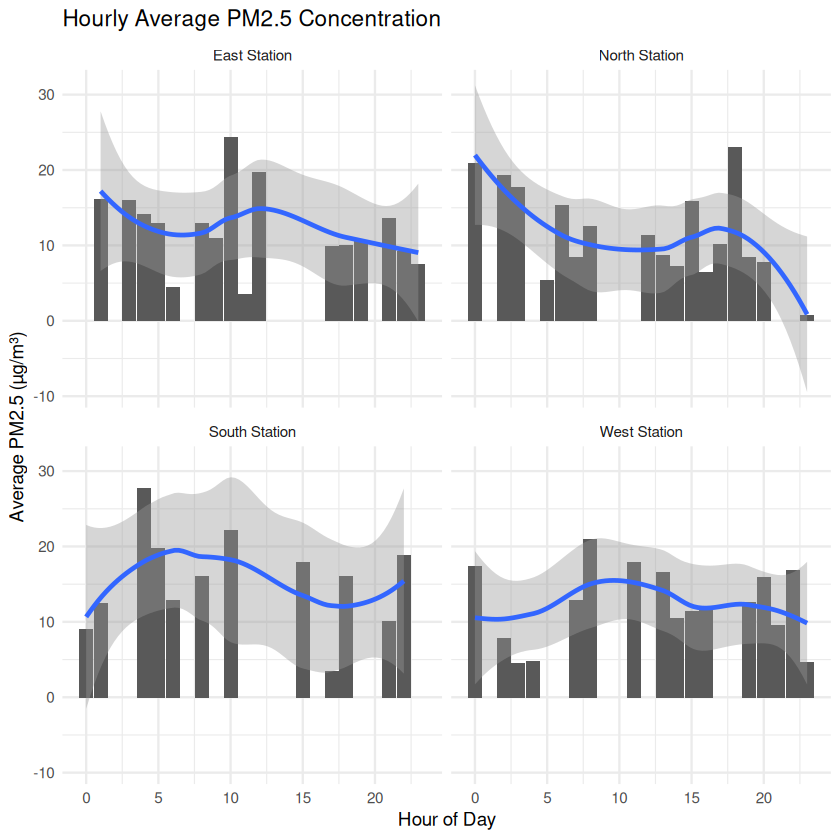

In [28]:
# Convert wide dataframe back to long

### BEGIN SOLUTION
# pivot longer (back to original format)
hourly_pm25_long <- hourly_pm25_wide %>%
  pivot_longer(
    cols = c(`North Station`, `South Station`, `East Station`, `West Station`),
    names_to = "location",
    values_to = "pm25_hourly"
  )
### END SOLUTION

# Create bar chart
# Uncomment the below line of code to start
# my_plot <- ggplot() 
### BEGIN SOLUTION
my_plot <- ggplot(hourly_pm25_long,aes(x=hour, y=pm25_hourly)) +
  geom_col() +
  geom_smooth() +
  facet_wrap(~ location) +
  labs(title='Hourly Average PM2.5 Concentration',
       x = "Hour of Day", y = "Average PM2.5 (µg/m³)") +
  theme_minimal()
### END SOLUTION
# Uncomment the below line of code to print your chart once created
my_plot


In [29]:
# your grade is based on the following tests: 
# Question 5 test 
if (nrow(hourly_pm25_long) != 96 |
    round(mean(hourly_pm25_long$pm25_hourly,na.rm=T),1) != 12.7 |
    round(var(hourly_pm25_long$pm25_hourly,na.rm=T),1) != 33.2){
    stop("You did not convert to a long dataframe correctly.")
} else if (my_plot$facet %>% inherits("FacetNull")){
    stop("You did not create subplots using facet_wrap.")
} else if (rlang::as_name(my_plot$mapping$x)!='hour' |
           rlang::as_name(my_plot$mapping$y)!='pm25_hourly'){
    stop("You did not use the correct x and y axis aesthetics.")
} else if (is.null(my_plot$labels$x) | is.null(my_plot$labels$y) | is.null(my_plot$labels$title)){
    stop("You did not set x and y axis labels and a chart title.")
} else{
    print("Nice work, you plotted from pivoted data correctly.")
}

[1] "Nice work, you plotted from pivoted data correctly."


### Part B (1 point)

Provide 1-2 sentences that describe any noticeable patterns, trends, or other key observations in the line charts. **Keep your answer brief; it should not exceed 1 line if possible.**

[Your Answer Here]